Kaggle Competition -- Otto Group Product Classification
==========

[Link to description page here](https://www.kaggle.com/c/otto-group-product-classification-challenge)

Read data from training file
-------

In [3]:
data.location <- '/Users/bshur/School/Extras/Data/'
data.train <- read.csv(paste0(data.location,'otto_train.csv'))
data.test <- read.csv(paste0(data.location,'otto_test.csv'))

Explore the data
------

In [4]:
names(data.train)

[1] "id"      "feat_1"  "feat_2"  "feat_3"  "feat_4"  "feat_5"  "feat_6" 
 [8] "feat_7"  "feat_8"  "feat_9"  "feat_10" "feat_11" "feat_12" "feat_13"
[15] "feat_14" "feat_15" "feat_16" "feat_17" "feat_18" "feat_19" "feat_20"
[22] "feat_21" "feat_22" "feat_23" "feat_24" "feat_25" "feat_26" "feat_27"
[29] "feat_28" "feat_29" "feat_30" "feat_31" "feat_32" "feat_33" "feat_34"
[36] "feat_35" "feat_36" "feat_37" "feat_38" "feat_39" "feat_40" "feat_41"
[43] "feat_42" "feat_43" "feat_44" "feat_45" "feat_46" "feat_47" "feat_48"
[50] "feat_49" "feat_50" "feat_51" "feat_52" "feat_53" "feat_54" "feat_55"
[57] "feat_56" "feat_57" "feat_58" "feat_59" "feat_60" "feat_61" "feat_62"
[64] "feat_63" "feat_64" "feat_65" "feat_66" "feat_67" "feat_68" "feat_69"
[71] "feat_70" "feat_71" "feat_72" "feat_73" "feat_74" "feat_75" "feat_76"
[78] "feat_77" "feat_78" "feat_79" "feat_80" "feat_81" "feat_82" "feat_83"
[85] "feat_84" "feat_85" "feat_86" "feat_87" "feat_88" "feat_89" "feat_90"
[92] "feat_91" "feat_92" "feat_93" "target"

In [5]:
get_features <- function(data,i_to_n=1:10) {
    features <- paste0('feat_',i_to_n)
    return(data[,c('id','target',features)])
}
get_features(data.train)[0:10,]

,id,target,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
1,1,Class_1,1,0,0,0,0,0,0,0,0,0
2,2,Class_1,0,0,0,0,0,0,0,1,0,0
3,3,Class_1,0,0,0,0,0,0,0,1,0,0
4,4,Class_1,1,0,0,1,6,1,5,0,0,1
5,5,Class_1,0,0,0,0,0,0,0,0,0,0
6,6,Class_1,2,1,0,0,7,0,0,0,0,0
7,7,Class_1,2,0,0,0,0,0,0,2,0,1
8,8,Class_1,0,0,0,0,0,0,0,0,0,0
9,9,Class_1,0,0,0,0,0,0,0,4,0,0
10,10,Class_1,0,0,0,0,0,0,1,0,0,0


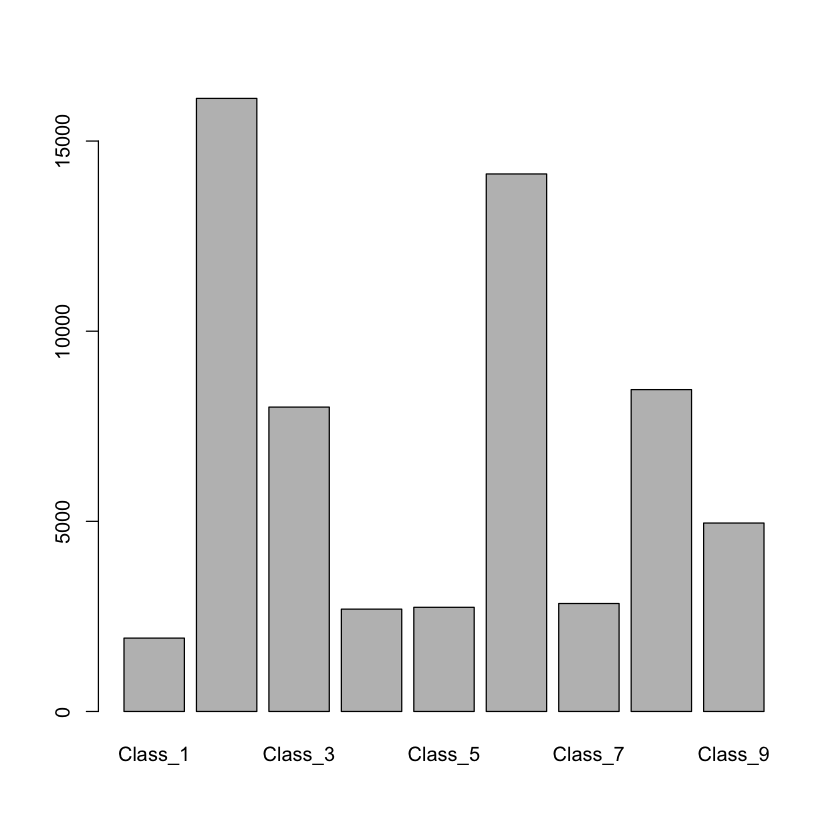

In [6]:
barplot(with(data.train
     ,table(target)
))

In [7]:
library(reshape2)

In [8]:
data.subset <- get_features(data.train)[,-1]

In [9]:
m <- melt(data.subset,id='target')
dcast(m, target~variable, max)

Warning message:
In .fun(.value[0], ...): no non-missing arguments to max; returning -Inf

,target,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
1,Class_1,25,10,7,5,19,5,19,56,7,26
2,Class_2,22,5,6,7,13,3,9,14,41,24
3,Class_3,22,7,5,5,4,3,7,13,43,22
4,Class_4,30,2,5,9,5,2,2,6,20,30
5,Class_5,3,2,4,5,2,1,1,6,15,4
6,Class_6,11,26,64,67,12,10,9,21,18,12
7,Class_7,13,39,10,10,5,3,15,22,17,30
8,Class_8,61,51,44,70,11,8,38,23,29,22
9,Class_9,13,5,6,11,6,3,8,76,15,22


In [10]:
dcast(m, target~variable, mean)

,target,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
1,Class_1,0.4416796,0.1290824,0.1653707,0.1596682,0.3271125,0.08501814,0.5132193,1.77605,0.1772939,0.4038362
2,Class_2,0.3313485,0.01501054,0.0857834,0.09397097,0.03380474,0.01277757,0.02208163,0.2249101,1.665922,0.1173552
3,Class_3,0.2416292,0.03123438,0.09807596,0.1026987,0.03885557,0.01236882,0.03885557,0.2572464,2.976012,0.2113943
4,Class_4,0.6105537,0.01300632,0.08992939,0.1204013,0.05351171,0.01300632,0.03307321,0.2567819,0.1114827,0.2820513
5,Class_5,0.02446148,0.03176342,0.05366922,0.06389193,0.05074845,0.005476451,0.003650968,0.4914202,0.1705002,0.02008032
6,Class_6,0.263601,0.3106473,3.290131,2.431553,0.05355501,0.02426601,0.1173682,0.3005306,0.2534843,0.2149982
7,Class_7,0.349771,0.3064459,0.2226136,0.3187742,0.0489609,0.03768933,0.4339556,0.6305037,0.45826,0.7794998
8,Class_8,0.5581285,1.153001,0.5413516,1.030482,0.1495747,0.06415406,0.8125,0.7816635,0.526465,0.5499764
9,Class_9,0.9376387,0.07971746,0.2391524,0.215338,0.09364279,0.01574168,0.09323915,3.468819,0.2926337,0.2514632


In [11]:
d1 <- dcast(m, target~variable, length )
d2 <- dcast(m, target~variable, function(x) { sum(x==0, na.rm=T) })

In [12]:
(d1 - d2)[,-1]

Warning message:
In Ops.factor(left, right): ‘-’ not meaningful for factors

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
1,445,186,251,219,203,108,427,1017,242,403
2,2797,189,1072,1135,378,162,306,2421,3537,939
3,1040,171,606,667,256,67,263,1283,2357,839
4,384,31,188,212,99,29,84,495,133,319
5,61,48,112,137,138,15,10,1085,202,48
6,1816,2777,7553,8012,600,230,1258,2517,2195,2060
7,511,333,424,562,113,95,596,856,648,694
8,1770,2788,1552,1747,859,396,2181,3633,1885,1732
9,1571,337,825,739,325,66,310,3259,843,649


In [13]:
d3 <- dcast(m, target~., max)
d3

Warning message:
In .fun(.value[0], ...): no non-missing arguments to max; returning -Inf

,target,.
1,Class_1,56
2,Class_2,41
3,Class_3,43
4,Class_4,30
5,Class_5,15
6,Class_6,67
7,Class_7,39
8,Class_8,70
9,Class_9,76


Create randomForest model
-------

In [14]:
library(randomForest)

randomForest 4.6-10
Type rfNews() to see new features/changes/bug fixes.


In [15]:
nrow(data.train)

[1] 61878

In [16]:
library(foreach)
library(doParallel)
registerDoParallel(cores=4)

In [ ]:
i <- 250000
k <- 4
d <- list()
foreach (z=1:k, .combine='rbind') %dopar% {
    data.train.sample <- data.train[sample(data.train, size=i, replace=TRUE),]
}

In [ ]:
nrow(data.train.sample); head(data.train.sample)

[1] 10000000

In [132]:
data.subset <- get_features(data.train.sample)[,-1]
m <- melt(data.subset,id='target')
d1 <- dcast(m, target~variable, length )
d2 <- dcast(m, target~variable, function(x) { sum(x==0, na.rm=T) })
(d1 - d2)[,-1]

Warning message:
In Ops.factor(left, right): ‘-’ not meaningful for factors

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
1,445,186,251,219,203,108,427,1017,242,403
2,2797,189,1072,1135,378,162,306,2421,3537,939
3,1040,171,606,667,256,67,263,1283,2357,839
4,384,31,188,212,99,29,84,495,133,319
5,61,48,112,137,138,15,10,1085,202,48
6,1816,2777,7553,8012,600,230,1258,2517,2195,2060
7,511,333,424,562,113,95,596,856,648,694
8,1770,2788,1552,1747,859,396,2181,3633,1885,1732
9,1571,337,825,739,325,66,310,3259,843,649


In [114]:
f <- randomForest(
    target~.
    ,data=data.train
    ,ntree=5000
)

In [116]:
p <- predict(f,data.train)

In [117]:
t <- data.train[,'target']

In [118]:
conf <- data.frame('predict'=p,'class'=t)
table(conf)

         class
predict   Class_1 Class_2 Class_3 Class_4 Class_5 Class_6 Class_7 Class_8
  Class_1       0       0       0       0       0       0       0       0
  Class_2    1753   16105    7900    2488    2550    1289    2208    3160
  Class_3       0       0       0       0       0       0       0       0
  Class_4       0       0       0       0       0       0       0       0
  Class_5       0       0       0       0       0       0       0       0
  Class_6     122      16      89     203     167   12793     415    1021
  Class_7       0       0       0       0       0       0       0       0
  Class_8      54       1      15       0      22      53     216    4283
  Class_9       0       0       0       0       0       0       0       0
         class
predict   Class_9
  Class_1       0
  Class_2    3980
  Class_3       0
  Class_4       0
  Class_5       0
  Class_6     665
  Class_7       0
  Class_8     310
  Class_9       0

In [119]:
table(p); table(t)

p
Class_1 Class_2 Class_3 Class_4 Class_5 Class_6 Class_7 Class_8 Class_9 
      0   41433       0       0       0   15491       0    4954       0 

t
Class_1 Class_2 Class_3 Class_4 Class_5 Class_6 Class_7 Class_8 Class_9 
   1929   16122    8004    2691    2739   14135    2839    8464    4955 